In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [287]:
data = pd.read_csv('creditcard.csv')

In [288]:
data.head()

,CUST_ID,BALANCE,CREDIT_LIMIT,TENURE,APPROVED
0,C10001,40.900749,1000,12,1
1,C10002,3202.467416,7000,12,1
2,C10003,2495.148862,7500,12,1
3,C10004,1666.670542,7500,12,1
4,C10005,817.714335,1200,12,1


### Exploratory Data Analysis

In [289]:
data['APPROVED'] = data['APPROVED'].map({1:'Yes', 0:'No'})

In [290]:
data.head(4)

,CUST_ID,BALANCE,CREDIT_LIMIT,TENURE,APPROVED
0,C10001,40.900749,1000,12,Yes
1,C10002,3202.467416,7000,12,Yes
2,C10003,2495.148862,7500,12,Yes
3,C10004,1666.670542,7500,12,Yes


In [291]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,250.0,2550.066538,2975.817373,0.0,339.960213,1592.378426,3613.406343,19043.13856
CREDIT_LIMIT,250.0,6308.200000,4635.661787,900.0,2500.000000,5400.000000,8500.000000,23000.00000
TENURE,250.0,11.736000,0.974733,6.0,12.000000,12.000000,12.000000,12.00000


In [292]:
list(data)

['CUST_ID', 'BALANCE', 'CREDIT_LIMIT', 'TENURE', 'APPROVED']

In [293]:
data.shape

(250, 5)

In [294]:
data.isnull().sum()

CUST_ID         0
BALANCE         0
CREDIT_LIMIT    0
TENURE          0
APPROVED        0
dtype: int64

In [295]:
data.tail(4)

,CUST_ID,BALANCE,CREDIT_LIMIT,TENURE,APPROVED
246,C10255,435.862142,12000,12,Yes
247,C10256,6.390383,1500,12,Yes
248,C10257,9612.215120,12000,12,Yes
249,C10258,7938.559134,12500,12,Yes


### Data Visualization

In [296]:
import warnings
warnings.filterwarnings('ignore')

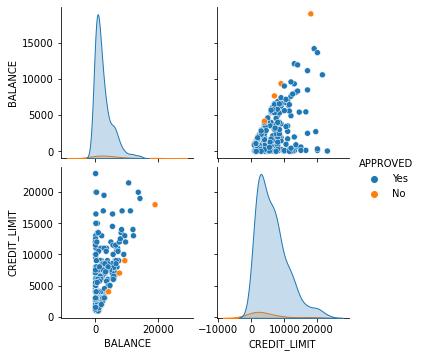

In [297]:
sns.pairplot(data= data, vars = ['BALANCE', 'CREDIT_LIMIT'], hue = 'APPROVED');

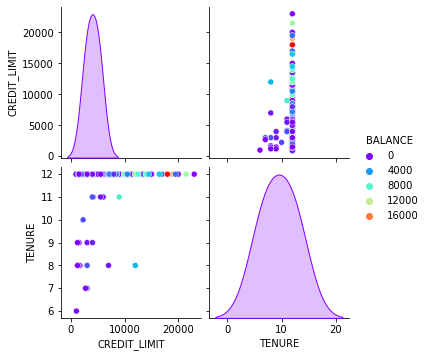

In [298]:
sns.pairplot(data= data, vars = ['CREDIT_LIMIT', 'TENURE'], hue = 'BALANCE', palette='rainbow');

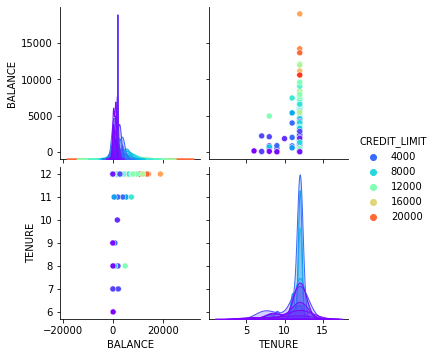

In [299]:
sns.pairplot(data= data, vars = ['BALANCE', 'TENURE'], hue = 'CREDIT_LIMIT', palette='rainbow');

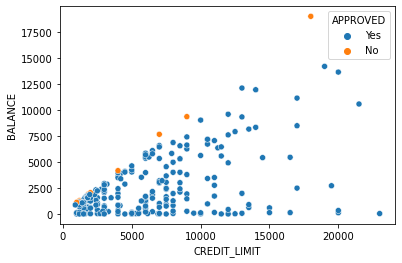

In [300]:
sns.scatterplot("CREDIT_LIMIT", "BALANCE",data=data,hue="APPROVED");

### Train Test Split

In [301]:
X=data.drop(["APPROVED", 'CUST_ID'],axis=1)
y=data['APPROVED']

In [302]:
X.head()

,BALANCE,CREDIT_LIMIT,TENURE
0,40.900749,1000,12
1,3202.467416,7000,12
2,2495.148862,7500,12
3,1666.670542,7500,12
4,817.714335,1200,12


In [303]:
y.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: APPROVED, dtype: object

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state =0)

### Standardize the Variables

In [305]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training and Predicting

In [306]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [307]:
pred = knn.predict(X_test)

In [308]:
from sklearn.metrics import classification_report, confusion_matrix

In [309]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       1.00      0.20      0.33         5
         Yes       0.94      1.00      0.97        58

    accuracy                           0.94        63
   macro avg       0.97      0.60      0.65        63
weighted avg       0.94      0.94      0.92        63



In [310]:
print(confusion_matrix(y_test, pred))

[[ 1  4]
 [ 0 58]]


In [311]:
print(y_test.values)

['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes']


### Cross Validation

In [312]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url = 'https://scikit-learn.org/stable/_images/grid_search_cross_validation.png', width = 800, height = 800)

In [313]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [314]:
neighbors = list(range(1, 50))

In [315]:
cv_score = [] 
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_score.append(scores.mean())

In [316]:
cv_score

[0.968421052631579,
 0.9625730994152046,
 0.968421052631579,
 0.968421052631579,
 0.9631578947368421,
 0.9631578947368421,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579,
 0.968421052631579]

The optimal number of neighbors is 1


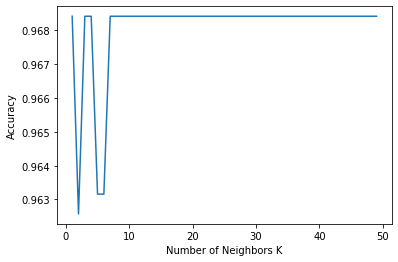

In [317]:
# determining best k
optimal_k = neighbors[cv_score.index(max(cv_score))]
print("The optimal number of neighbors is {}".format(optimal_k))
# plot accuracy vs k
plt.plot(neighbors, cv_score)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.show()

In [318]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [319]:
pred = knn.predict(X_test)

In [320]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         5
         Yes       0.92      1.00      0.96        58

    accuracy                           0.92        63
   macro avg       0.46      0.50      0.48        63
weighted avg       0.85      0.92      0.88        63



In [321]:
print(confusion_matrix(y_test,pred))

[[ 0  5]
 [ 0 58]]


In [322]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

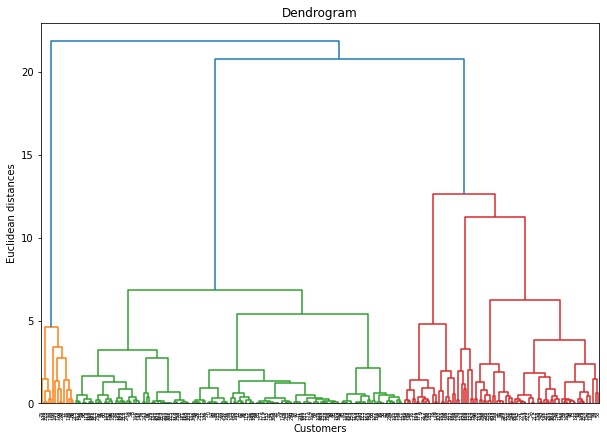

In [323]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

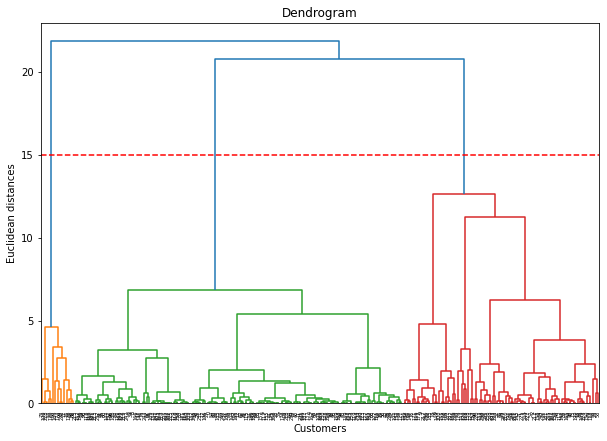

In [324]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [325]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
pred = hc.fit_predict(X)

In [326]:
data['APPROVED'] = pred
data.head(4)

,CUST_ID,BALANCE,CREDIT_LIMIT,TENURE,APPROVED
0,C10001,40.900749,1000,12,2
1,C10002,3202.467416,7000,12,1
2,C10003,2495.148862,7500,12,1
3,C10004,1666.670542,7500,12,1


In [327]:
data['APPROVED'].value_counts()

2    105
1     93
0     52
Name: APPROVED, dtype: int64

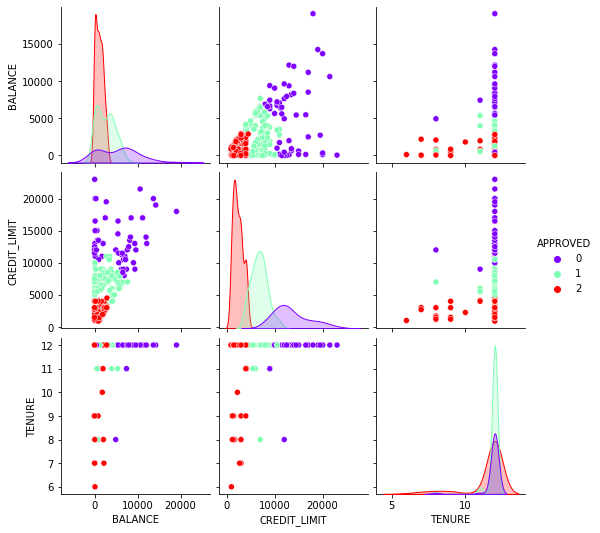

In [328]:
sns.pairplot(data, hue='APPROVED', palette='rainbow');

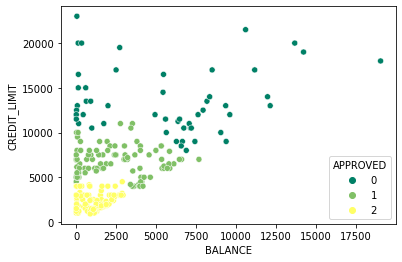

In [329]:
sns.scatterplot("BALANCE", "CREDIT_LIMIT",data=data,hue="APPROVED", palette = 'summer');